### Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Define working directories

In [2]:
path_raw_data = 'C:/users/lbros/documents/mids/w207/final_project/raw_data/'
path_clean_data = 'C:/users/lbros/documents/mids/w207/final_project/clean_data/'

### Step 3: Read data

In [3]:
# import the datasets
ratings_df = dev_train = pd.read_csv(path_raw_data + 'ratings.csv')

### Step 4: Explore the data

#### Overview

The ratings data has **26,024,289** ratings from **270,896 users** for **45,115 movies**.

Ratings data variables:
- **userId:** user identification
- **movieID:** movie identification
- **rating:** movie rating in a scale from 0 to 5 in intervals of 0.5
- **timestamp:** timestamp of the rating

There is **no-missing values**.

In [4]:
ratings_df.shape

(26024289, 4)

In [5]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [7]:
num_users = ratings_df.userId.unique().shape[0]
num_users

270896

In [8]:
num_movies = ratings_df.movieId.unique().shape[0]
num_movies

45115

In [9]:
pd.isnull(ratings_df).sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### Distribution of Ratings per User

Half of the users have 30 or lower ratings.

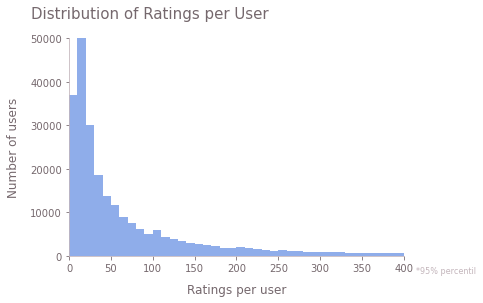

In [10]:
ratings_per_user = ratings_df.groupby('userId').count().rating
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#C4B6BC')
ax.spines['left'].set_color('#C4B6BC')
ax.tick_params(axis='x', colors='#75686D')
ax.tick_params(axis='y', colors='#75686D')
ax.hist(ratings_per_user, bins=40, range=(0, 400), color='#8FADEA')
plt.text(x=415, y=-4000, s='*95% percentil', fontsize=8, color='#C4B6BC', ha='left')
plt.title('Distribution of Ratings per User', pad=20, fontsize=15, x=0.24, color='#75686D')
plt.ylabel('Number of users', fontsize=12, labelpad=10, color='#75686D')
plt.yticks(np.arange(0, 60000, step=10000))
plt.ylim((0, 50000))
plt.xlabel('Ratings per user', fontsize=12, labelpad=10, color='#75686D')
plt.xticks(np.arange(0, 450, step=50))
plt.xlim(0, 400)
plt.show()

In [11]:
round(ratings_per_user.describe(percentiles=np.arange(0.1, 1.0, step=0.1)), 1)

count    270896.0
mean         96.1
std         205.7
min           1.0
10%           6.0
20%          13.0
30%          16.0
40%          20.0
50%          30.0
60%          46.0
70%          72.0
80%         119.0
90%         236.0
max       18276.0
Name: rating, dtype: float64

#### Distribution of Ratings per Movie

Half of the movies have 8 or lower ratings.

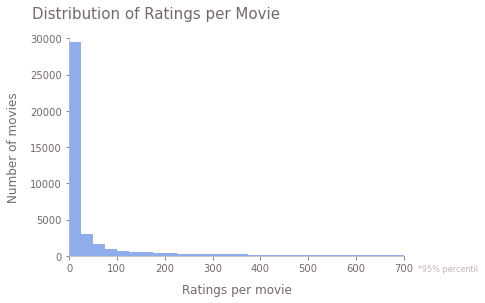

In [12]:
ratings_per_movie = ratings_df.groupby('movieId').count().rating
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#C4B6BC')
ax.spines['left'].set_color('#C4B6BC')
ax.tick_params(axis='x', colors='#75686D')
ax.tick_params(axis='y', colors='#75686D')
ax.hist(ratings_per_movie, bins=28, range=(0,700), color='#8FADEA')
plt.text(x=730, y=-2100, s='*95% percentil', fontsize=8, color='#C4B6BC', ha='left')
plt.title('Distribution of Ratings per Movie', pad=20, fontsize=15, x=0.26, color='#75686D')
plt.ylabel('Number of movies', fontsize=12, labelpad=10, color='#75686D')
plt.yticks(np.arange(0, 40000, step=5000))
plt.ylim((0, 30000))
plt.xlabel('Ratings per movie', fontsize=12, labelpad=10, color='#75686D')
plt.xticks(np.arange(0, 800, step=100))
plt.xlim(0, 700)
plt.show()

In [13]:
round(ratings_per_movie.describe(percentiles=np.arange(0.1, 1.0, step=0.1)), 1)

count    45115.0
mean       576.8
std       3037.4
min          1.0
10%          1.0
20%          2.0
30%          3.0
40%          5.0
50%          8.0
60%         16.0
70%         39.0
80%        133.2
90%        695.0
max      91921.0
Name: rating, dtype: float64

#### Distribution of Ratings

Half of ratings are 3.5 or above.

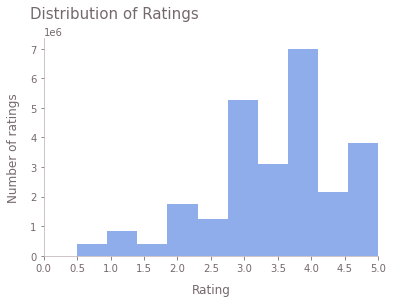

In [14]:
ratings = ratings_df.rating
fig = plt.figure(figsize=(6, 4), facecolor='white')
ax = plt.subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#C4B6BC')
ax.spines['left'].set_color('#C4B6BC')
ax.tick_params(axis='x', colors='#75686D')
ax.tick_params(axis='y', colors='#75686D')
ax.hist(ratings, bins=10, color='#8FADEA')
plt.title('Distribution of Ratings', pad=20, fontsize=15, x=0.21, color='#75686D')
plt.ylabel('Number of ratings', fontsize=12, labelpad=10, color='#75686D')
plt.xlabel('Rating', fontsize=12, labelpad=10, color='#75686D')
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlim(0, 5)
plt.show()

In [15]:
round(ratings.describe(percentiles=np.arange(0.1, 1.0, step=0.1)), 1)

count    26024289.0
mean            3.5
std             1.1
min             0.5
10%             2.0
20%             3.0
30%             3.0
40%             3.5
50%             3.5
60%             4.0
70%             4.0
80%             4.5
90%             5.0
max             5.0
Name: rating, dtype: float64